In [422]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [423]:
demand = pd.read_csv('day.csv')
demand.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data preparation

In [424]:
# Dropping irrelevant columns
demand = demand.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)
demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Converting feature values to categories
### season, weathersit

In [425]:
# Remapping season
demand['season'] = demand['season'].apply(lambda x: {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}[x])
demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [426]:
# Remapping weathersit
demand['weathersit'] = demand['weathersit'].apply(lambda x: {1: 'clear', 2: 'misty', 3: 'lightrain', 4: 'heavyrain'}[x])
demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [427]:
# Remapping month
demand['mnth'] = demand['mnth'].apply(lambda x: {1: 'jan', 2: 'feb', 3: 'mar', 4: 'apr', 5: 'may', 6: 'jun', 7: 'jul', 8: 'aug', 9: 'sep', 10: 'oct', 11: 'nov', 12:'dec'}[x])
demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,6,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,0,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [428]:
demand['weekday'] = demand['weekday'].apply(lambda x: {0: 'tue', 1: 'wed', 2: 'thu', 3: 'fri', 4: 'sat', 5: 'sun', 6: 'mon'}[x])
demand.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


## Univariate analysis of categorical variables

- Evaluating the following categorical variables, season, weathersit, mnth, weekday

In [429]:
def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None):
    """
    Create a Seaborn bar plot for a specified column in a DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the data.
        x_column (str): The name of the column to be plotted on the x-axis.
        y_column (str, optional): The name of the column to be plotted on the y-axis. Default is None.
        hue_column (str, optional): The name of the column to use for color differentiation. Default is None.
        title (str, optional): The title of the plot. Default is None.
        xlabel (str, optional): Label for the x-axis. Default is None.
        ylabel (str, optional): Label for the y-axis. Default is None.
        figsize (tuple, optional): Figure size in inches (width, height). Default is (10, 6).
        x_tick_rotation (int, optional): Rotation value for x-axis ticks. Default is 90.
        freq_rotation (int, optional): Rotation value for the exact frequency labels on each bar. Default is 0.
        filter_column (str, optional): The name of the column to filter on. Default is None.
        filter_value (any, optional): The value to filter the data on. Default is None.

    Returns:
        None
    """
    
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] > filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    if y_column:
        y_data = (filtered_dataframe[y_column].value_counts()) / (dataframe[y_column].value_counts()) * 100
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

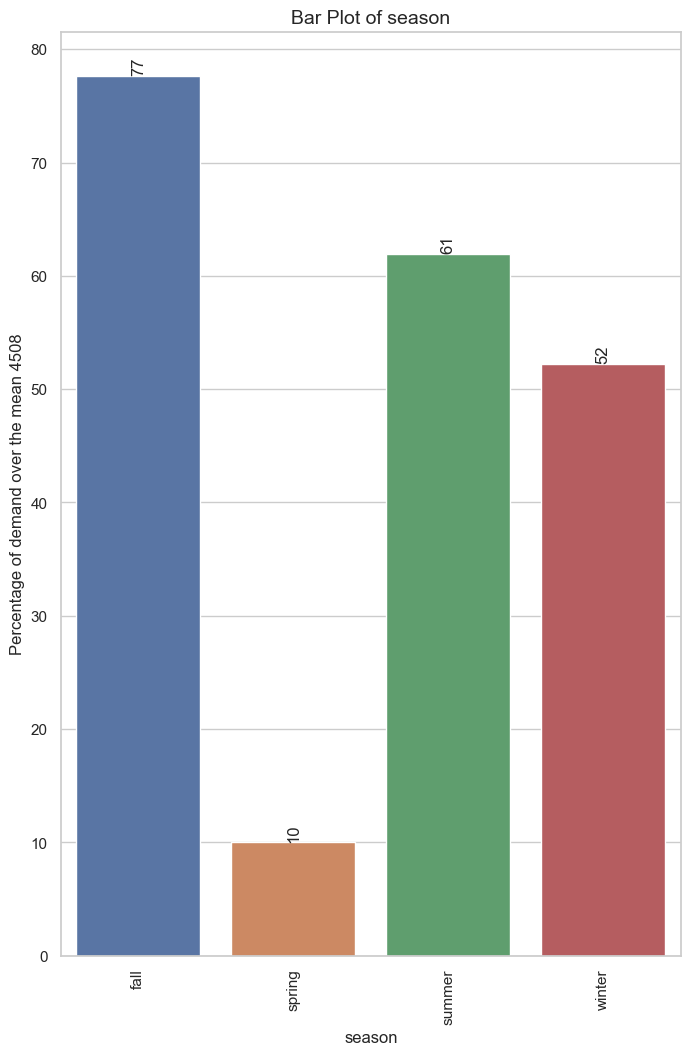

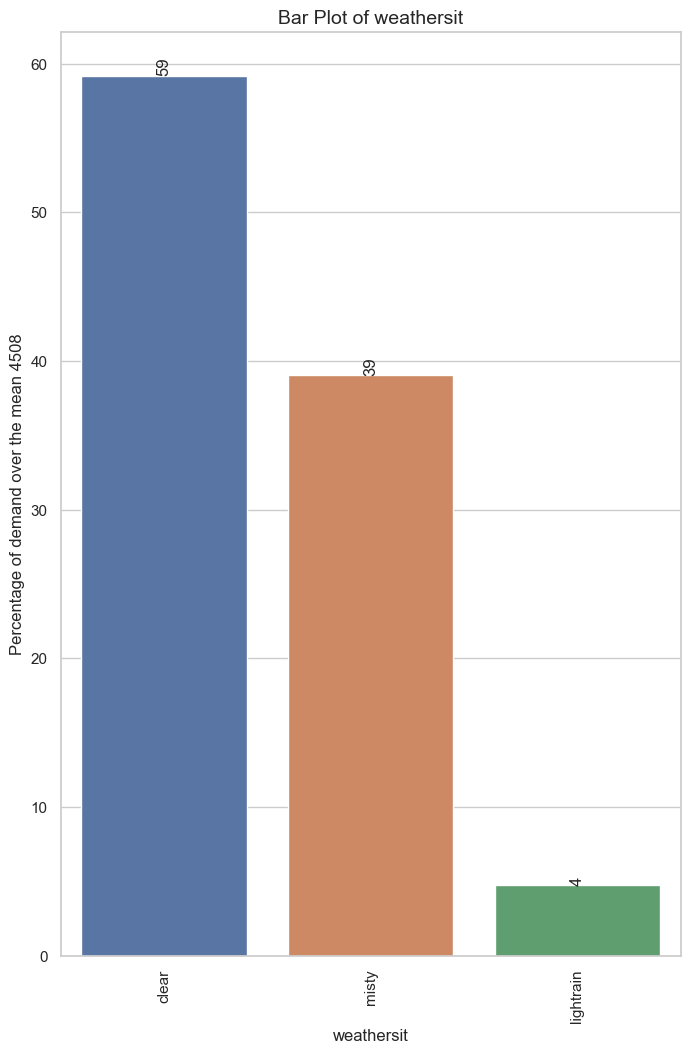

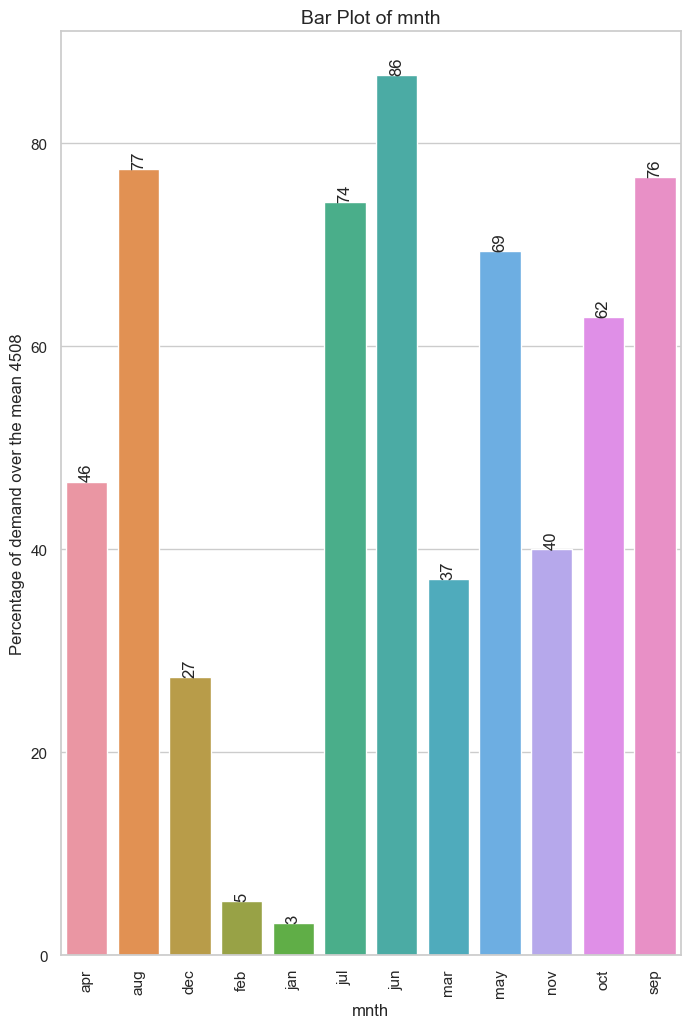

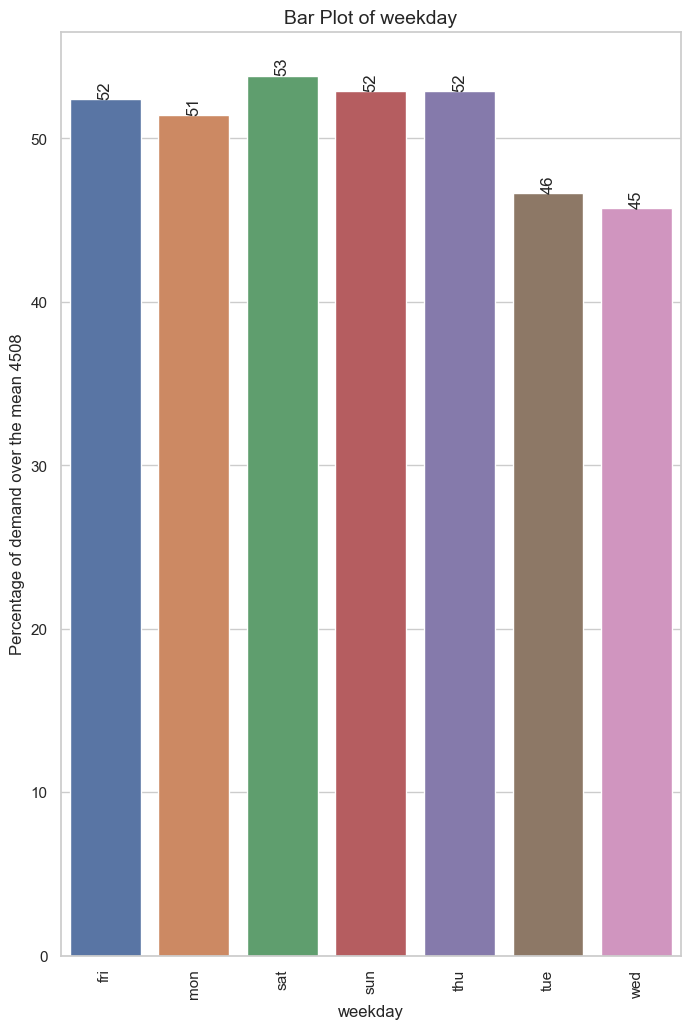

In [430]:
# Plotting categorical variables
for var in ['season', 'weathersit', 'mnth', 'weekday']:
    plot_bar_graph(
        demand,
        x_column = var,
        y_column = var,
        title = f'Bar Plot of {var}',
        xlabel = var,
        ylabel=f"Percentage of demand over the mean {round(demand['cnt'].mean())}",
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='cnt',
        filter_value = round(demand['cnt'].mean())
    )

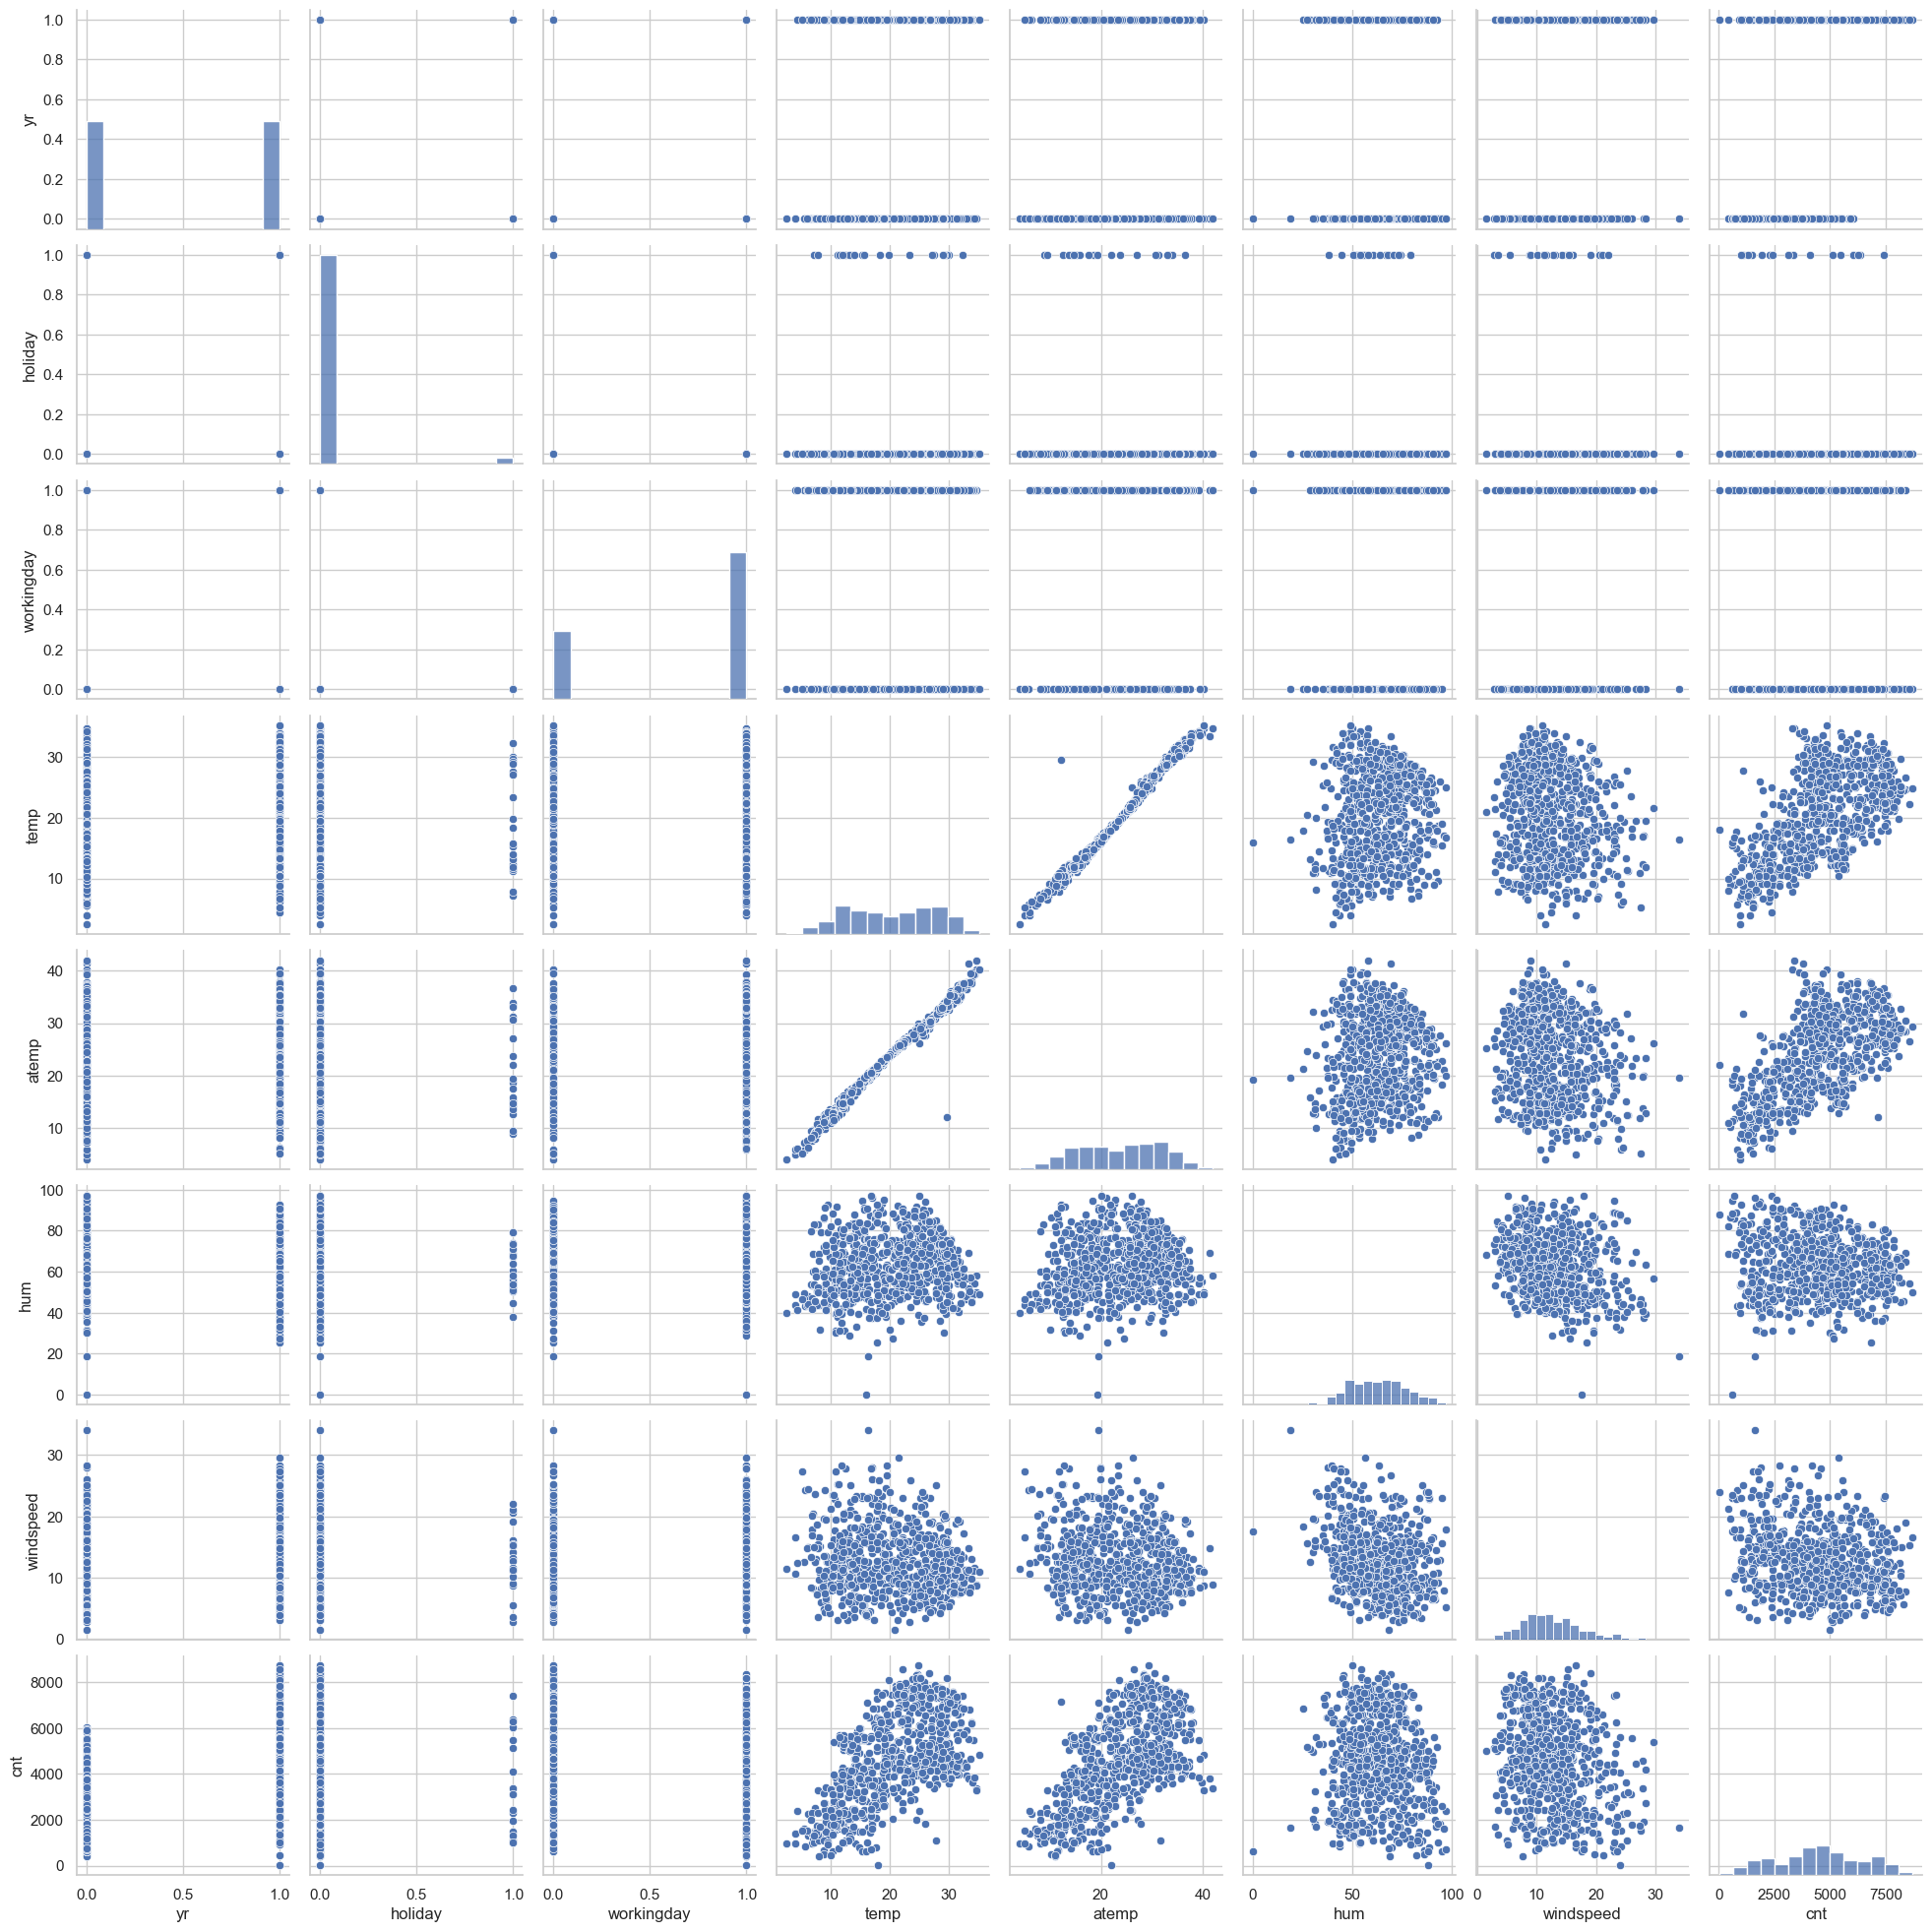

In [431]:
sns.pairplot(demand)
plt.show()

In [432]:
# Create dummy columns
def add_dummy_columns(df, column):
    dummy_columns = pd.get_dummies(df[column], drop_first=True, dtype=int)
    df = pd.concat([df, dummy_columns], axis=1)
    df = df.drop(column, axis=1)
    return df

In [433]:
demand = add_dummy_columns(demand, 'season')
demand = add_dummy_columns(demand, 'weathersit')
demand = add_dummy_columns(demand, 'mnth')
demand = add_dummy_columns(demand, 'weekday')

In [434]:
demand.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model building and evaluation

In [435]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

import seaborn as sns


In [436]:
# Splitting data into train and test dataframe
demand_train, demand_test = train_test_split(demand, train_size=0.7, random_state=20)

In [437]:
# Scale all the columns in training and test set
scaler = MinMaxScaler()

In [438]:
demand_train[demand.columns] = scaler.fit_transform(demand_train[demand.columns])
demand_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
260,0.0,0.0,0.0,0.537125,0.527854,0.714653,0.372381,0.484554,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
202,0.0,0.0,1.0,0.982573,1.000000,0.596830,0.264112,0.372715,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
317,0.0,0.0,1.0,0.566531,0.573774,0.603684,0.678015,0.511285,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
473,1.0,0.0,1.0,0.525144,0.531235,0.629820,0.103866,0.773421,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
431,1.0,0.0,1.0,0.563263,0.573763,0.583548,1.000000,0.624259,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [439]:
demand_test[demand.columns] = scaler.fit_transform(demand_test[demand.columns])
demand_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
283,0.0,0.0,1.0,0.658395,0.652491,0.825962,0.202726,0.522434,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
453,1.0,0.0,1.0,0.403271,0.414317,0.522739,0.191842,0.625518,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
266,0.0,0.0,0.0,0.710284,0.678080,0.897472,0.061267,0.621376,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
269,0.0,0.0,1.0,0.749201,0.692209,0.927961,0.148314,0.471468,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
120,0.0,0.0,0.0,0.509213,0.515724,0.763876,0.122461,0.382996,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [440]:
y_train = demand_train.pop('cnt')
X_train = demand_train

In [441]:
y_test = demand_test.pop('cnt')
X_test = demand_test

### Creating heatmap 

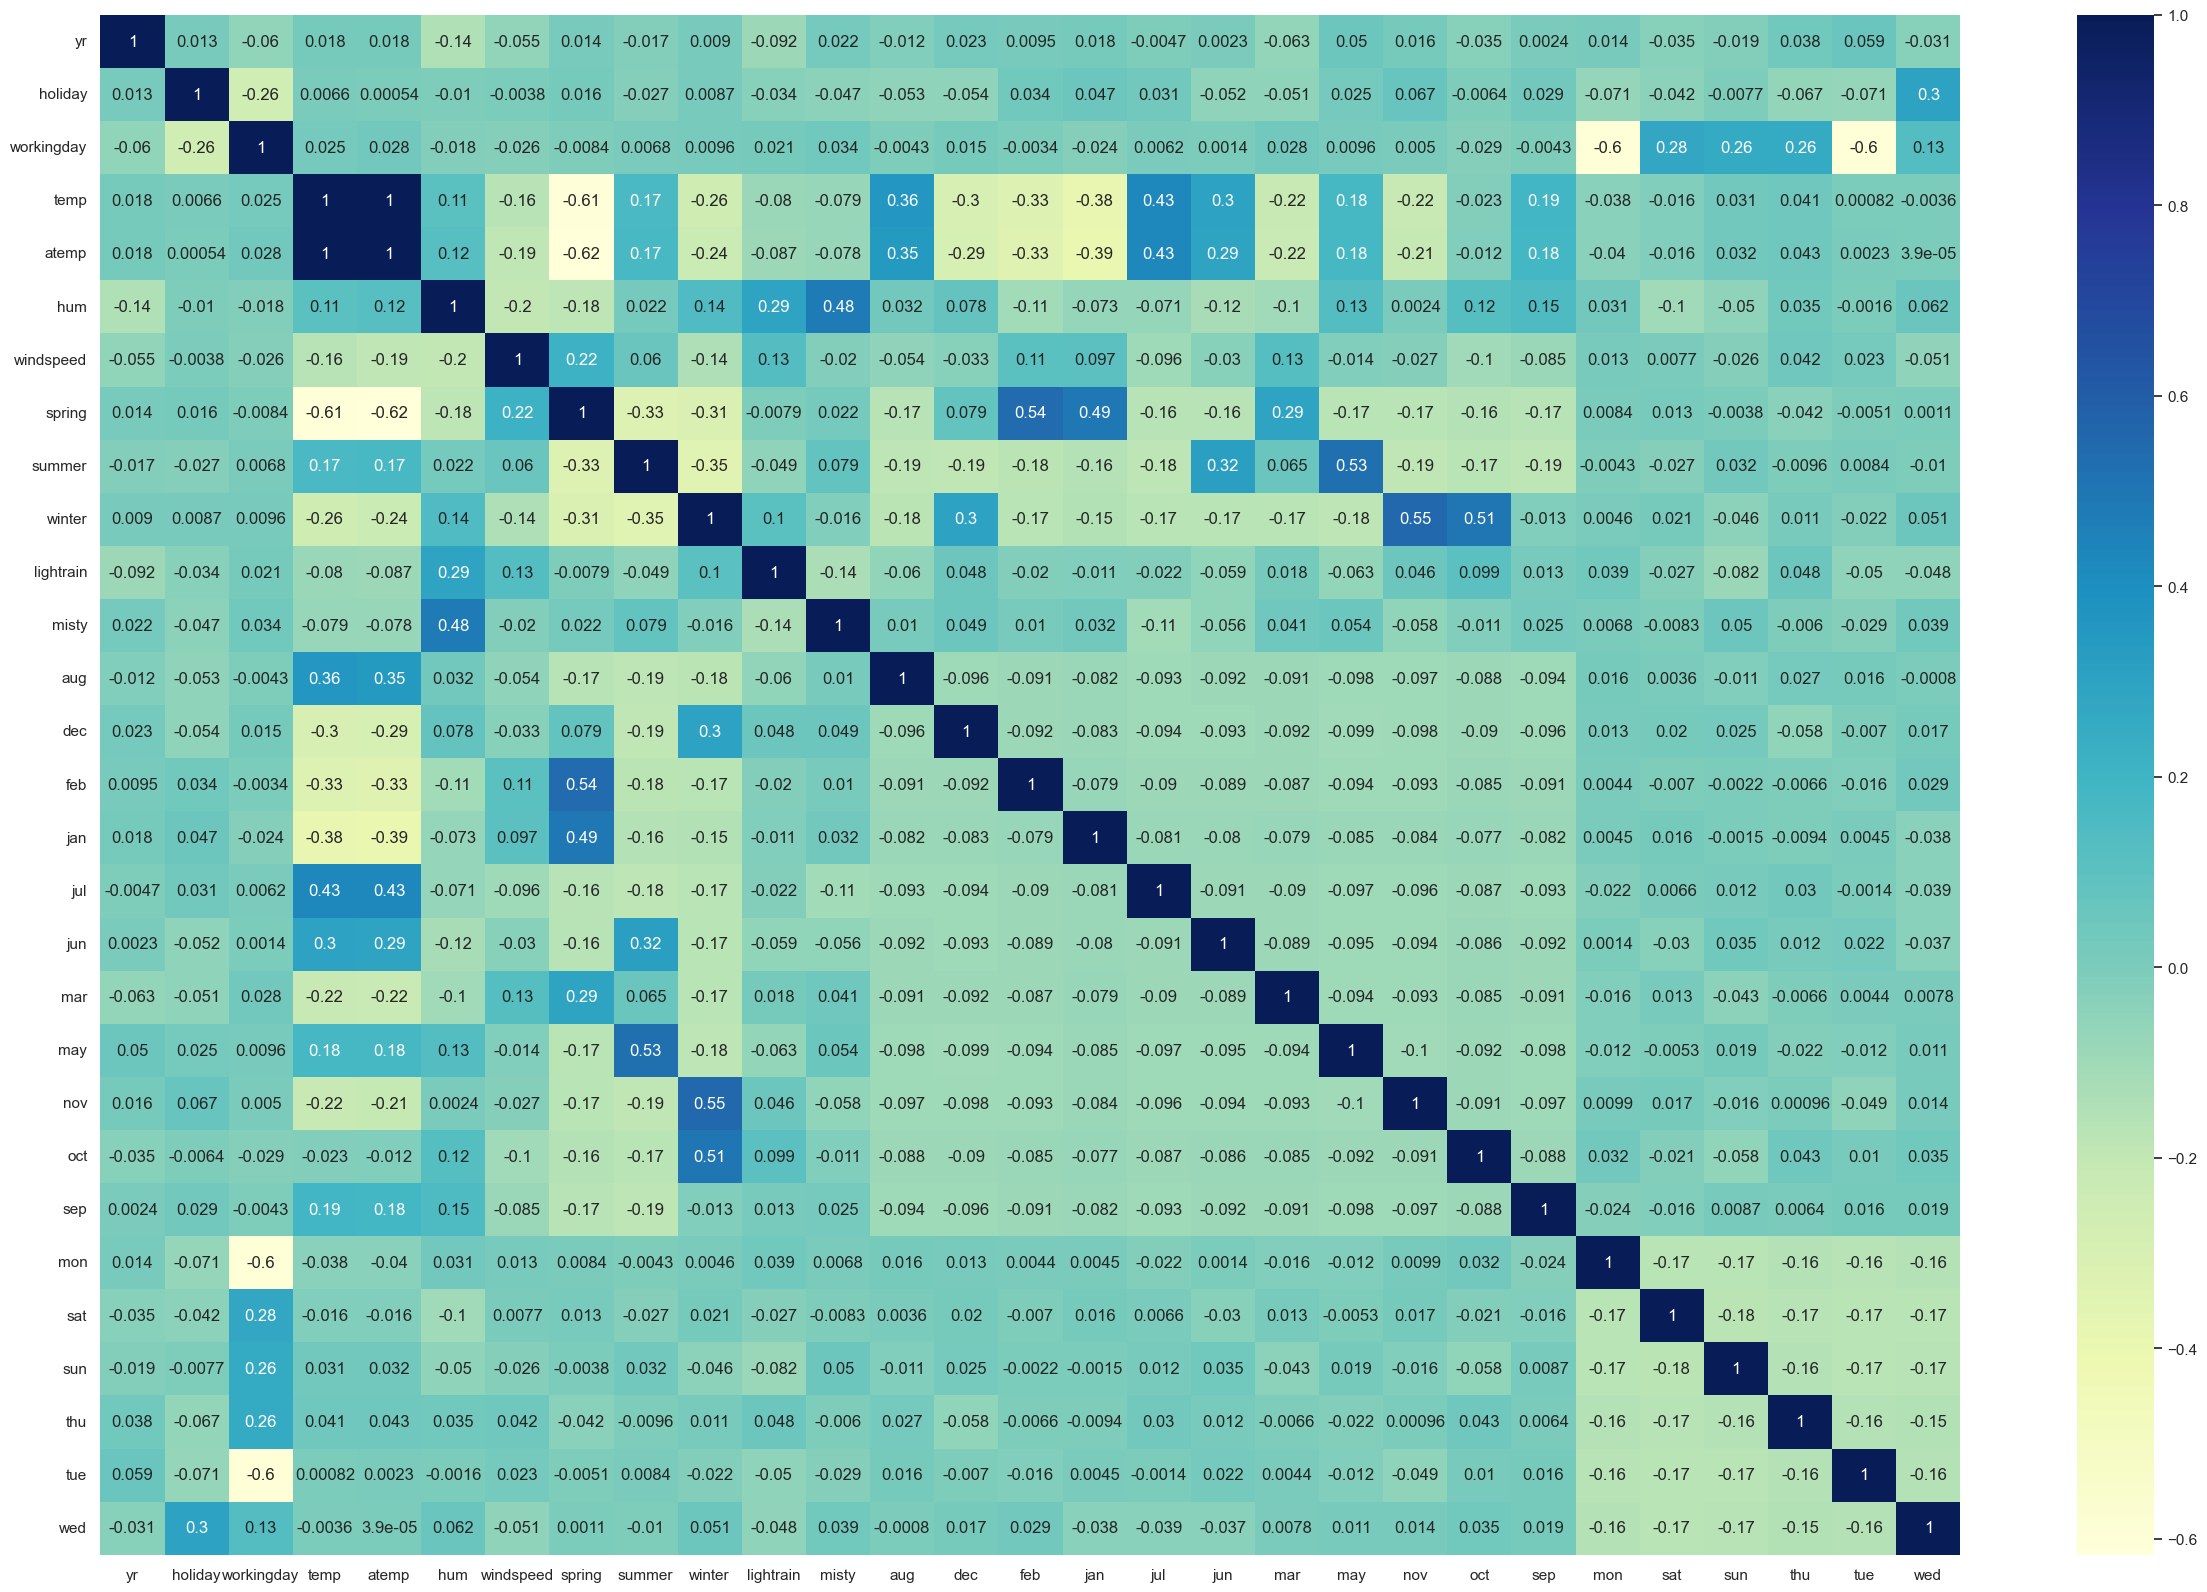

In [442]:
plt.figure(figsize=(30,20))
sns.heatmap(demand_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

- Shows that year, temp and a temp are highly correlated with cnt

### Feature selection

In [443]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')


In [444]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [445]:
X_train.columns.size

29

- There are 29 features overall, let's assume we only want half of them to be present. So, let ask RFE to give us about 18 columns in an automated fashion

In [446]:
rfe = RFE(lm, n_features_to_select=18)
rfe = rfe.fit(X_train, y_train)

In [447]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 9),
 ('summer', True, 1),
 ('winter', True, 1),
 ('lightrain', True, 1),
 ('misty', True, 1),
 ('aug', True, 1),
 ('dec', False, 12),
 ('feb', False, 10),
 ('jan', True, 1),
 ('jul', False, 2),
 ('jun', False, 4),
 ('mar', False, 5),
 ('may', False, 3),
 ('nov', False, 8),
 ('oct', True, 1),
 ('sep', True, 1),
 ('mon', True, 1),
 ('sat', False, 7),
 ('sun', False, 11),
 ('thu', False, 6),
 ('tue', True, 1),
 ('wed', True, 1)]

In [448]:
rfe_columns = X_train.columns[rfe.support_]

In [449]:
X_train_rfe = X_train[rfe_columns]

In [450]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,summer,winter,lightrain,misty,aug,jan,oct,sep,mon,tue,wed
260,0.0,0.0,0.0,0.537125,0.527854,0.714653,0.372381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
202,0.0,0.0,1.0,0.982573,1.000000,0.596830,0.264112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
317,0.0,0.0,1.0,0.566531,0.573774,0.603684,0.678015,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
473,1.0,0.0,1.0,0.525144,0.531235,0.629820,0.103866,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
431,1.0,0.0,1.0,0.563263,0.573763,0.583548,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [451]:
def train_and_vif(X, y) :
    X_sm = sm.add_constant(X)
    lr = sm.OLS(y, X_sm)
    lr_model = lr.fit()
    print(lr_model.summary())
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    print("\n-------- VIF -------\n")
    print(vif)

In [452]:
train_and_vif(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     148.3
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.25e-181
Time:                        19:21:53   Log-Likelihood:                 461.24
No. Observations:                 510   AIC:                            -886.5
Df Residuals:                     492   BIC:                            -810.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1769      0.027      6.667      0.0

In [453]:
# atemp has high p and high vif. Let's eliminate that
rfe_columns = rfe_columns.drop('atemp')
X_train_rfe = X_train[rfe_columns]
train_and_vif(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.43e-182
Time:                        19:21:53   Log-Likelihood:                 460.94
No. Observations:                 510   AIC:                            -887.9
Df Residuals:                     493   BIC:                            -815.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1811      0.026      6.980      0.0

In [454]:
# holiday has a high p and a low vif
rfe_columns = rfe_columns.drop('holiday')
X_train_rfe = X_train[rfe_columns]
train_and_vif(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.43e-182
Time:                        19:21:53   Log-Likelihood:                 460.94
No. Observations:                 510   AIC:                            -887.9
Df Residuals:                     493   BIC:                            -815.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1890      0.042      4.472      0.0

In [455]:
# tue has a high p and a low vif
rfe_columns = rfe_columns.drop('tue')
X_train_rfe = X_train[rfe_columns]
train_and_vif(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.3
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.82e-183
Time:                        19:21:53   Log-Likelihood:                 460.56
No. Observations:                 510   AIC:                            -889.1
Df Residuals:                     494   BIC:                            -821.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2111      0.033      6.310      0.0

In [456]:
# hum has a high vif
rfe_columns = rfe_columns.drop('hum')
X_train_rfe = X_train[rfe_columns]
train_and_vif(X_train_rfe, y_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     171.7
Date:                Sun, 26 May 2024   Prob (F-statistic):          1.15e-179
Time:                        19:21:53   Log-Likelihood:                 449.80
No. Observations:                 510   AIC:                            -869.6
Df Residuals:                     495   BIC:                            -806.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0985      0.023      4.218      0.0

In [457]:
# # temp has a high vif
# rfe_columns = rfe_columns.drop('temp')
# X_train_rfe = X_train[rfe_columns]
# train_and_vif(X_train_rfe, y_train)

In [458]:
# # mon seems to have a high p
# rfe_columns = rfe_columns.drop('mon')
# X_train_rfe = X_train[rfe_columns]
# train_and_vif(X_train_rfe, y_train)


In [459]:
rfe_columns.size

14

In [460]:
X_train = X_train[rfe_columns]

In [461]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [462]:
y_train_pred = lm.predict(X_train)

<Axes: xlabel='cnt', ylabel='Density'>

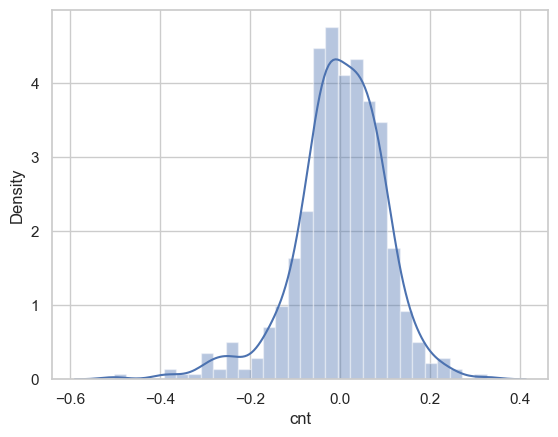

In [463]:
residuals = y_train - y_train_pred

sns.distplot(residuals)

In [464]:
trainingr2 = r2_score(y_train, y_train_pred)
trainingr2

0.8292545172766131

In [465]:

X_test = X_test[rfe_columns]
y_test_pred = lm.predict(X_test)
testr2 = r2_score(y_test, y_test_pred)
testr2

0.8112669664097185

In [466]:
## Equation
slopes = np.round(lm.coef_,2)
intercept = np.round(lm.intercept_,2)

model_slope_params = pd.DataFrame()
model_slope_params['column'] = rfe_columns
model_slope_params['slope'] = slopes
model_slope_params = model_slope_params.sort_values(by='slope', ascending=False)

equation = ""
for _,row in model_slope_params.iterrows():
    equation += f" ({row['slope']}) * {row['column']} + "
equation += f"{intercept}"
print(f"Multiple Linear Regression Equation: {equation}")


Multiple Linear Regression Equation:  (0.52) * temp +  (0.26) * yr +  (0.13) * sep +  (0.12) * winter +  (0.11) * summer +  (0.06) * oct +  (0.05) * workingday +  (0.05) * aug +  (0.04) * mon +  (-0.04) * jan +  (-0.04) * wed +  (-0.09) * misty +  (-0.15) * windspeed +  (-0.27) * lightrain + 0.1


## Observations

- Temp has a VIF of 6. Since it's less that 10, if not optimal to right out remove it. If we remove temperature from the feature set, then the r2 score drops from 0.82 to 0.67. Hence we are choosing to let it stay
- The test R-Squared value is 0.811